## Preparation

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('total Healthy Tomato images :', len(os.listdir('dataset_itr2 - Copy/train/Tomato___healthy')))
print('total Bacterial Spot Tomato images :', len(os.listdir('dataset_itr2 - Copy/train/Tomato___Bacterial_spot')))
print('total Early Blight Tomato images :', len(os.listdir('dataset_itr2 - Copy/train/Tomato___Early_blight')))
print('total Late Blight Tomato images :', len(os.listdir('dataset_itr2 - Copy/train/Tomato___Late_blight')))
print('total Septoria Leaf Spot Tomato images :', len(os.listdir('dataset_itr2 - Copy/train/Tomato___septoria_leaf_spot')))

print('total Healthy Corn images :', len(os.listdir('dataset_itr2 - Copy/train/Corn_(maize)___healthy')))
print('total Cercospora Leaf Spot Gray Corn images :', len(os.listdir('dataset_itr2 - Copy/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')))
print('total Common Rust Corn images :', len(os.listdir('dataset_itr2 - Copy/train/Corn_(maize)___Common_rust_')))
print('total Northern Late Blight Corn images :', len(os.listdir('dataset_itr2 - Copy/train/Corn_(maize)___Northern_Leaf_Blight')))

total Healthy Tomato images : 1500
total Bacterial Spot Tomato images : 1500
total Early Blight Tomato images : 1500
total Late Blight Tomato images : 1500
total Septoria Leaf Spot Tomato images : 1500
total Healthy Corn images : 1500
total Cercospora Leaf Spot Gray Corn images : 1500
total Common Rust Corn images : 1500
total Northern Late Blight Corn images : 1500


## Preprocessing

In [ ]:
train_dir = os.path.join('dataset_itr2 - Copy/train')
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 10800 images belonging to 9 classes.
Found 2700 images belonging to 9 classes.


## Modelling

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(9, activation='softmax')  
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

## Training

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=20,
                              verbose=2)

Epoch 1/20
1350/1350 - 123s - loss: 1.4645 - accuracy: 0.4307 - val_loss: 1.0881 - val_accuracy: 0.5670
Epoch 2/20
1350/1350 - 69s - loss: 0.8676 - accuracy: 0.6614 - val_loss: 0.8735 - val_accuracy: 0.6578
Epoch 3/20
1350/1350 - 69s - loss: 0.6760 - accuracy: 0.7357 - val_loss: 0.7018 - val_accuracy: 0.7233
Epoch 4/20
1350/1350 - 77s - loss: 0.5580 - accuracy: 0.7754 - val_loss: 0.5187 - val_accuracy: 0.8015
Epoch 5/20
1350/1350 - 92s - loss: 0.4808 - accuracy: 0.8118 - val_loss: 0.5815 - val_accuracy: 0.7752
Epoch 6/20
1350/1350 - 104s - loss: 0.4214 - accuracy: 0.8344 - val_loss: 0.4896 - val_accuracy: 0.8211
Epoch 7/20
1350/1350 - 105s - loss: 0.3610 - accuracy: 0.8579 - val_loss: 0.5137 - val_accuracy: 0.8167
Epoch 8/20
1350/1350 - 104s - loss: 0.3135 - accuracy: 0.8794 - val_loss: 0.4140 - val_accuracy: 0.8426
Epoch 9/20
1350/1350 - 103s - loss: 0.2996 - accuracy: 0.8877 - val_loss: 0.3680 - val_accuracy: 0.8578
Epoch 10/20
1350/1350 - 103s - loss: 0.2667 - accuracy: 0.8987 - val

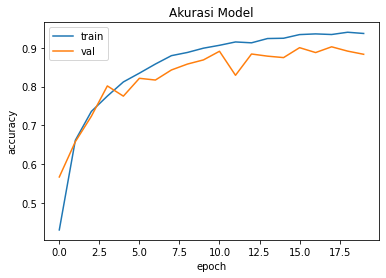

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediction

In [ ]:
testing_datagen = ImageDataGenerator()
test_dir = "dataset_itr2 - Copy/test"
test_generator = testing_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=8,
    shuffle=False,
    class_mode='categorical'
)

Found 9788 images belonging to 9 classes.


In [ ]:
test_score = model.evaluate_generator(test_generator, 8)

In [ ]:
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

[INFO] accuracy: 98.44%
[INFO] Loss:  0.09863539785146713


In [ ]:
    # Plot the confusion matrix. Set Normalize = True/False
    import itertools
    from sklearn.metrics import classification_report, confusion_matrix


    def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.figure(figsize=(20, 20))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cm = np.around(cm, decimals=2)
            cm[np.isnan(cm)] = 0.0
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')


    

C:\Users\Rizal Widyananda\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Normalized confusion matrix
                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.71      0.93      0.80       408
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       952
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.80      0.86       788
                            Corn_(maize)___healthy       0.99      1.00      0.99       928
                           Tomato___Bacterial_spot       0.96      0.85      0.90      1700
                             Tomato___Early_blight       0.60      0.89      0.71       800
                              Tomato___Late_blight       0.90      0.78      0.84      1524
                       Tomato___Septoria_leaf_spot       0.92      0.82      0.87      1416
                                  Tomato___healthy       0.88      1.00      0.94      1272

                                          accuracy

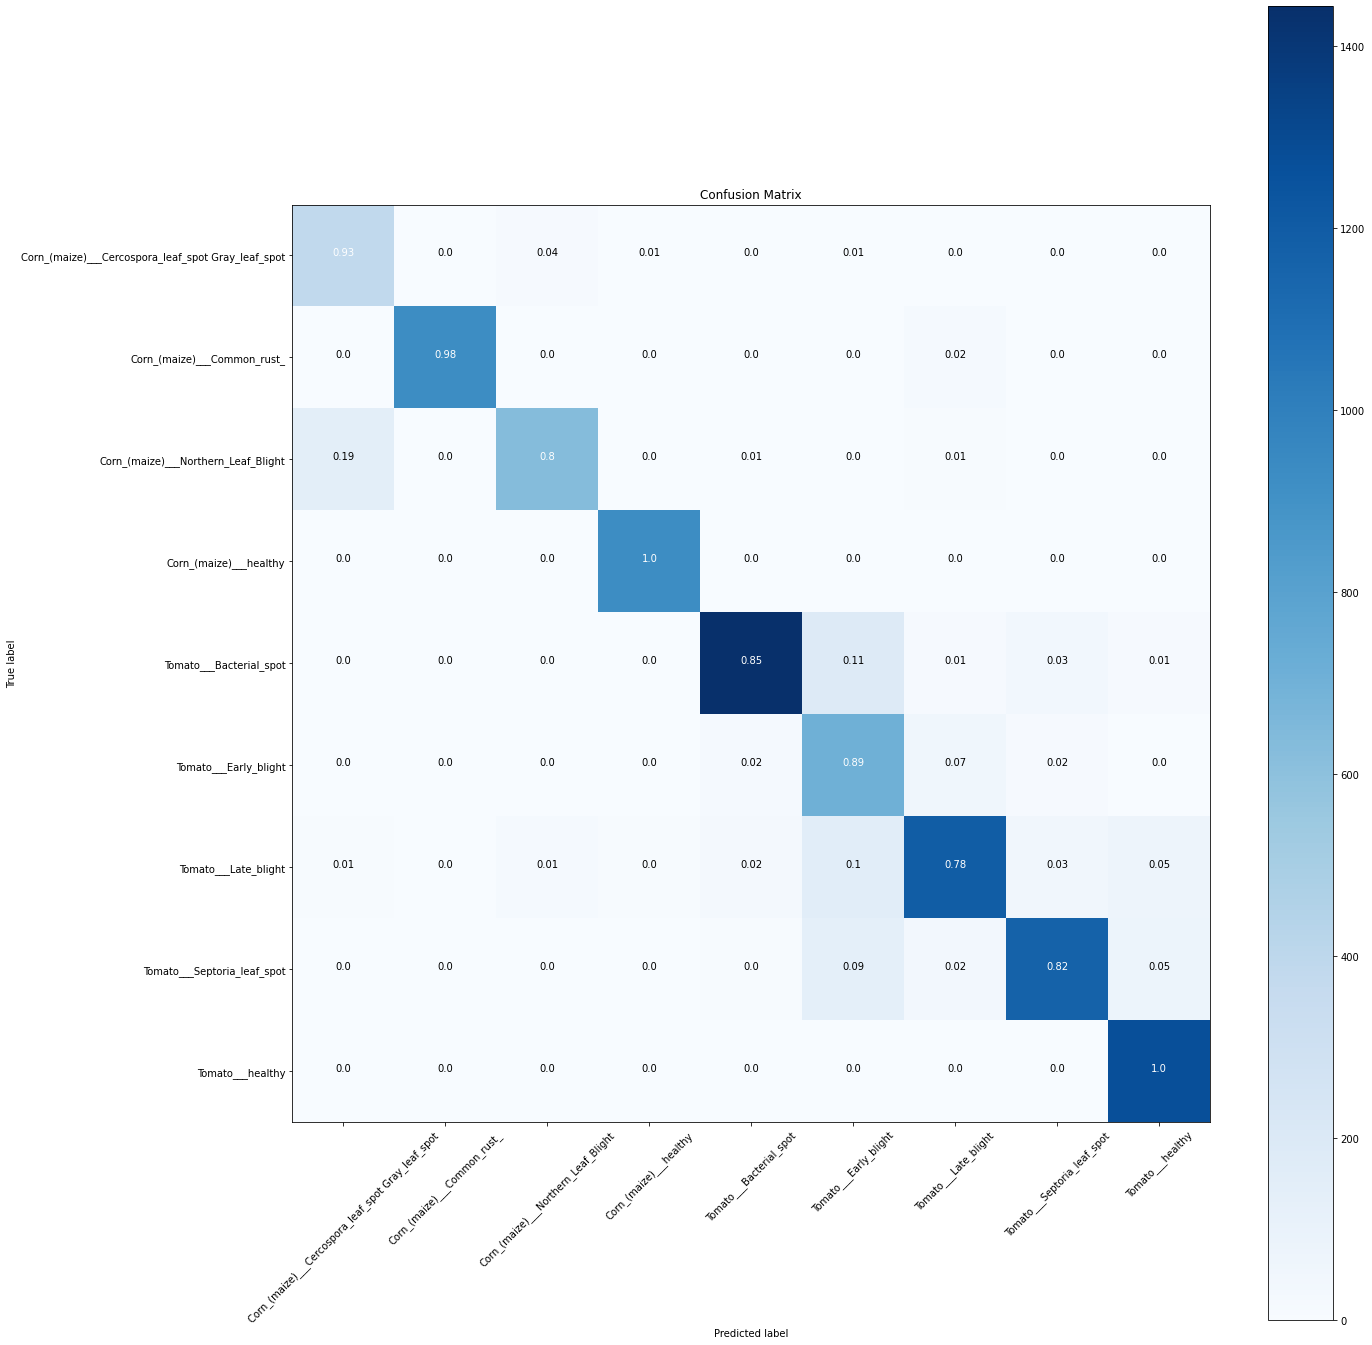

In [ ]:
# Print the Target names
# shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
# Confution Matrix
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
# Print Classification Report
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
# Jika belom ditrain, pake aja yang udah di train
# model = tf.keras.models.load_model('my_model')

In [ ]:
test_generator.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Tomato___Bacterial_spot': 4,
 'Tomato___Early_blight': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___healthy': 8}

In [ ]:
train_generator.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Tomato___Bacterial_spot': 4,
 'Tomato___Early_blight': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___healthy': 8}

In [ ]:
from tensorflow.keras.preprocessing import image

img_contoh = image.load_img("ini gambar.jpeg", target_size=(150, 150))
img_contoh_array = image.img_to_array(img_contoh)
img_contoh_batch = np.expand_dims(img_contoh_array, axis=0)
# img_contoh_batch /= 255

prediction2 = model.predict(img_contoh_batch)
print(prediction2)
prediction2 = np.argmax(prediction2[0])
print(prediction2)

[[4.6434590e-05 8.4823242e-12 1.1182431e-06 9.9995208e-01 1.8826996e-09
  4.2214123e-12 1.4513459e-08 1.2650156e-07 1.9749631e-07]]
3


## Export Model (Deployment)

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model_baru.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\RIZALW~1\AppData\Local\Temp\tmpm4giyt4h\assets


In [ ]:
model.save('my_model_baru') #Biar bisa pake lagi tanpa harus run ulang

INFO:tensorflow:Assets written to: my_model_baru\assets


INFO:tensorflow:Assets written to: my_model_baru\assets


In [ ]:
# Nyobain dikit
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
sess

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6

